In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Volver al índice
1. [Regresar al índice](./indice.ipynb)

# **Tabla de Frecuencias y Histograma**

Tabla de frecuencias:
  Intervalo  Frecuencia Absoluta  Frecuencia Relativa  Frecuencia Acumulada
0       0-5                  145                0.290                   145
1      6-10                  106                0.212                   251
2     11-15                  101                0.202                   352
3     16-20                  126                0.252                   478


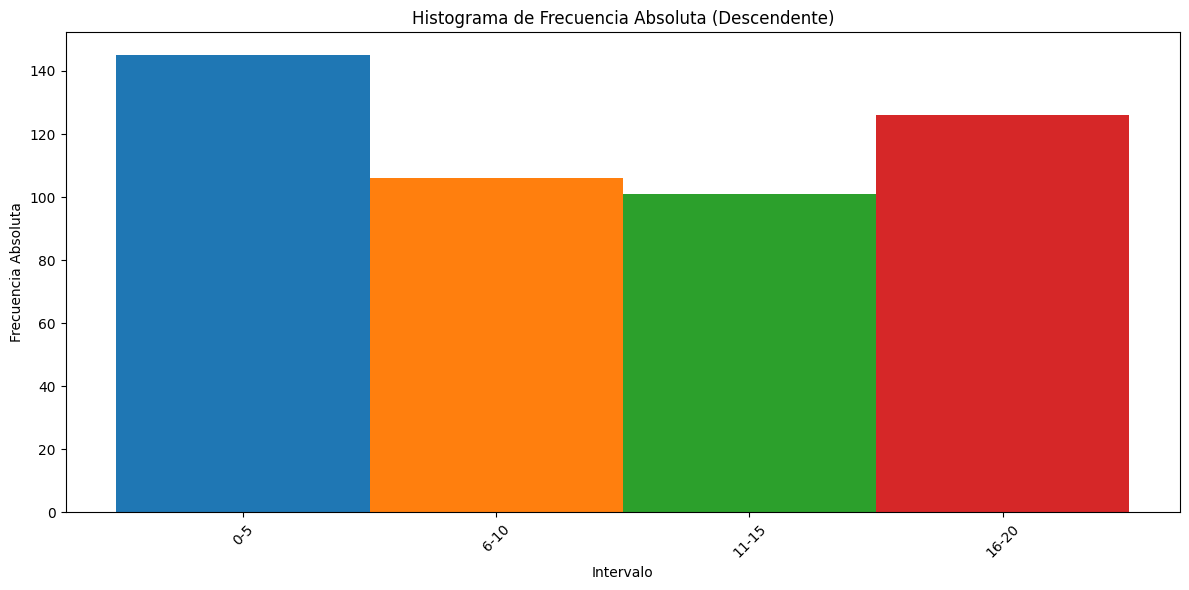

In [2]:
# Importar las bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Contexto: Horas de estudio por semana de 500 estudiantes
np.random.seed(42)  # Semilla para reproducibilidad
horas_estudio = np.random.randint(0, 21, size=500)

# Agrupar los datos en intervalos
bins = [0, 5, 10, 15, 20]
labels = ['0-5', '6-10', '11-15', '16-20']
horas_grupadas = pd.cut(horas_estudio, bins=bins, labels=labels, right=False)

# Crear tabla de frecuencias
tabla_frecuencia = horas_grupadas.value_counts().sort_index()
tabla_frecuencia = pd.DataFrame({
    "Intervalo": tabla_frecuencia.index,
    "Frecuencia Absoluta": tabla_frecuencia.values,
})
tabla_frecuencia["Frecuencia Relativa"] = tabla_frecuencia["Frecuencia Absoluta"] / len(horas_estudio)
tabla_frecuencia["Frecuencia Acumulada"] = tabla_frecuencia["Frecuencia Absoluta"].cumsum()

# Ordenar la tabla por frecuencia absoluta (de mayor a menor)
3#tabla_frecuencia = tabla_frecuencia.sort_values(by="Frecuencia Absoluta", ascending=False)

# Mostrar la tabla
print("Tabla de frecuencias:")
print(tabla_frecuencia)
# Graficar la frecuencia absoluta usando un histograma
freq_desc = tabla_frecuencia.set_index('Intervalo')['Frecuencia Absoluta']
plt.figure(figsize=(12, 6))
colors = plt.cm.tab10(np.arange(len(freq_desc)))
plt.bar(freq_desc.index, freq_desc.values, color=colors, width=1.0)  # Ancho ajustado a 1.0
plt.xlabel('Intervalo')
plt.ylabel('Frecuencia Absoluta')
plt.title('Histograma de Frecuencia Absoluta (Descendente)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Diagrama de barras Horizontales**

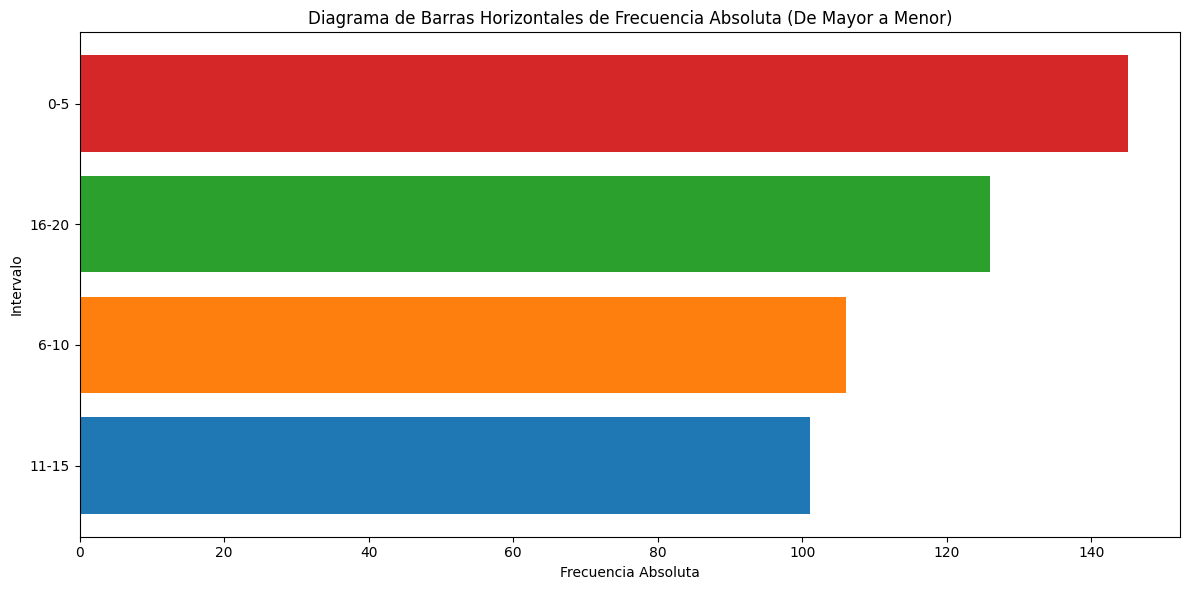

In [3]:
# Diagrama de barras horizontales de frecuencia absoluta (de mayor a menor)
freq_asc = tabla_frecuencia.sort_values(by="Frecuencia Absoluta", ascending=True)
plt.figure(figsize=(12, 6))
colors_h = plt.cm.tab10(np.arange(len(freq_asc)))
plt.barh(freq_asc['Intervalo'], freq_asc['Frecuencia Absoluta'], color=colors_h)
plt.xlabel('Frecuencia Absoluta')
plt.ylabel('Intervalo')
plt.title('Diagrama de Barras Horizontales de Frecuencia Absoluta (De Mayor a Menor)')
plt.tight_layout()
plt.show()

# **Poligono de Frecuencia Relativa**

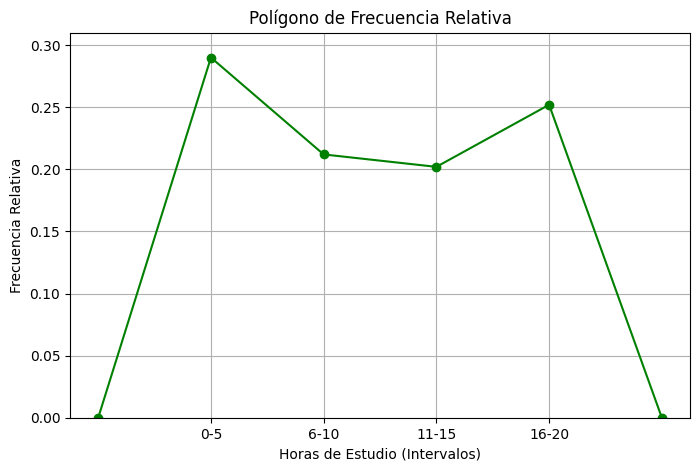

In [4]:
# Calcular puntos medios
midpoints = [(bins[i] + bins[i+1]) / 2 for i in range(len(bins)-1)]
frecuencia_relativa = tabla_frecuencia["Frecuencia Relativa"].tolist()

# Agregar puntos inicial y final con frecuencia 0
midpoints = [bins[0] - (bins[1] - bins[0])/2] + midpoints + [bins[-1] + (bins[1] - bins[0])/2]
frecuencia_relativa = [0] + frecuencia_relativa + [0]

# Graficar el polígono de frecuencia relativa
plt.figure(figsize=(8, 5))
plt.plot(midpoints, frecuencia_relativa, marker='o', linestyle='-', color='green')
plt.title("Polígono de Frecuencia Relativa")
plt.xlabel("Horas de Estudio (Intervalos)")
plt.ylabel("Frecuencia Relativa")
plt.grid(True)
plt.xticks([(bins[i] + bins[i+1]) / 2 for i in range(len(bins)-1)], labels)
plt.ylim(0, max(frecuencia_relativa) + 0.02)
plt.show()

# **Grafica de pastel**

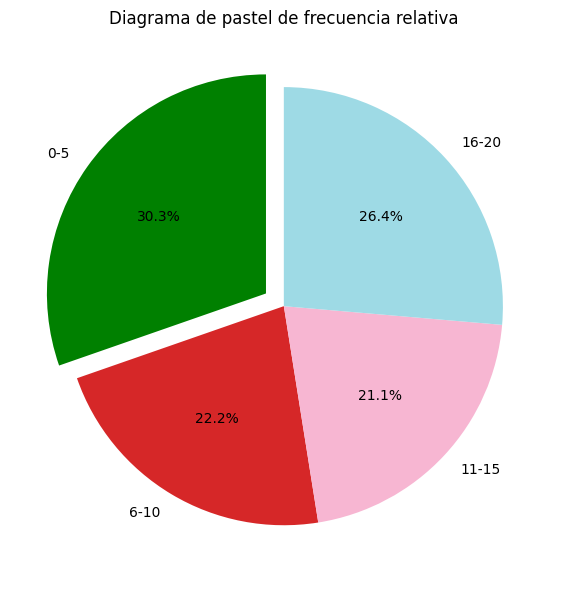

In [5]:
# Extraer frecuencias relativas y etiquetas
freq_rel = tabla_frecuencia["Frecuencia Relativa"]
etiquetas = tabla_frecuencia["Intervalo"].astype(str)

# Generar paleta de colores y resaltar el slice más grande
palette = plt.cm.tab20(np.linspace(0, 1, len(freq_rel)))
colors_pie = [
    'green' if v == freq_rel.max() else palette[i]
    for i, v in enumerate(freq_rel)
]

# Dibujar el diagrama de pastel
plt.figure(figsize=(6, 6))
plt.pie(
    freq_rel.values,
    labels=etiquetas,
    startangle=90,
    explode=[0.1 if v == freq_rel.max() else 0 for v in freq_rel],
    colors=colors_pie,
    autopct='%1.1f%%'
)
plt.title('Diagrama de pastel de frecuencia relativa')
plt.tight_layout()
plt.show()

# **Ojiva de frecuencia Acumulada**

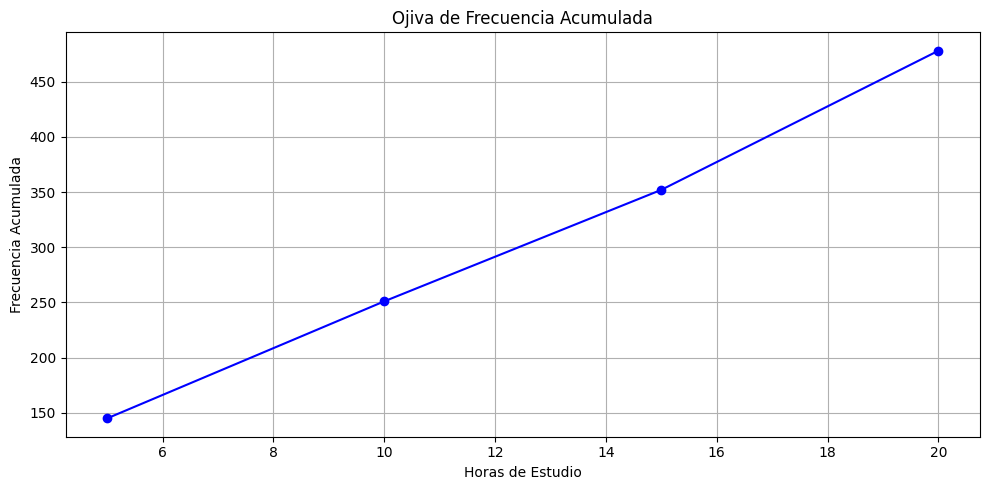

In [6]:
# Paso 1: Definir los límites superiores de cada clase (excepto el último límite)
x_ojiva = bins[1:]  # [5, 10, 15, 20]

# Paso 2: Obtener la frecuencia acumulada (¡ya está bien calculada!)
y_ojiva = tabla_frecuencia["Frecuencia Acumulada"].values

# Paso 3: Graficar la ojiva
plt.figure(figsize=(10, 5))
plt.plot(x_ojiva, y_ojiva, marker='o', linestyle='-', color='blue')
plt.title('Ojiva de Frecuencia Acumulada')
plt.xlabel('Horas de Estudio')
plt.ylabel('Frecuencia Acumulada')
plt.grid(True)
plt.tight_layout()
plt.show()
